# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
%matplotlib inline

Итак, прочитаем нашу таблицу:

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [4]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


/tmp/ipykernel_253694/3480800453.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(eda_data.corr(), annot = True);


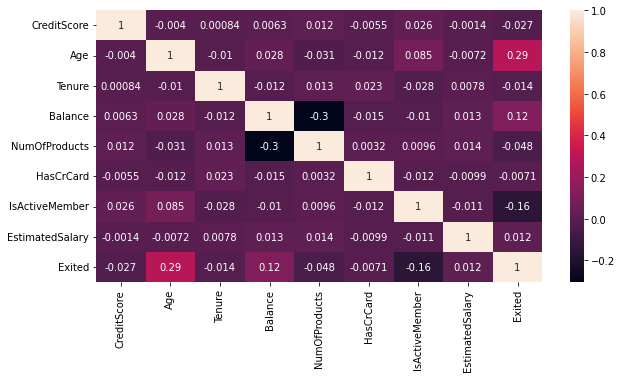

In [6]:
# Оцениваем мультиколинеарность и взаимосвязь с целевым признаком
eda_data = churn_data.drop(['RowNumber', 'CustomerId'], axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(eda_data.corr(), annot = True);

Как видим, наиболее скореллированы с целевым признаком возраст Age и баланс на счете Balance - положительная корреляция, и отрицательная корреляция с признаком является ли активным членом IsActiveMember.

Сразу же глянем на графики распределения по Германии, поскольку далее будем исследовать именно эту часть датасета

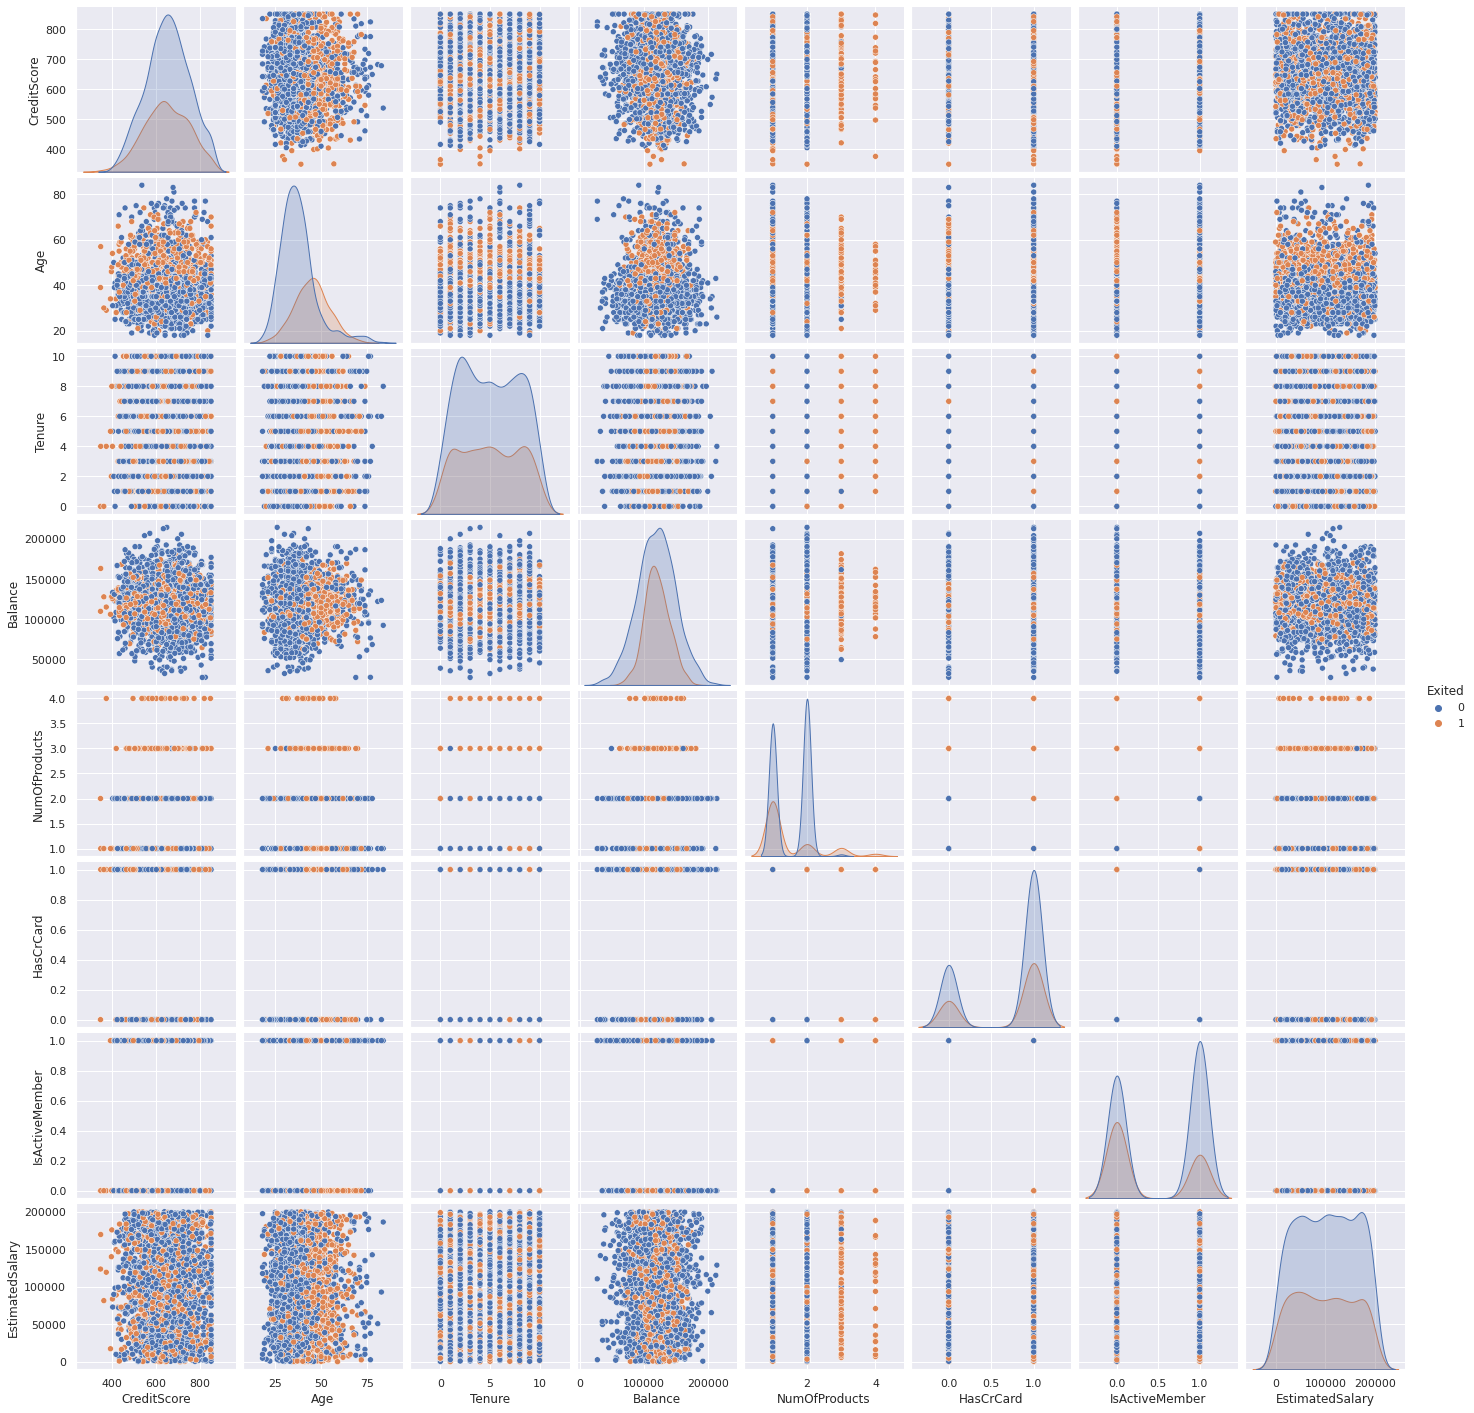

In [7]:
sns.set_theme()
sns.pairplot(eda_data[eda_data['Geography'] == 'Germany'], hue="Exited")

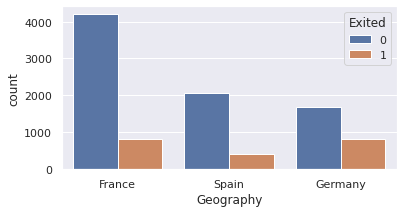

In [8]:
# посмотрим на сбалансированность классов по странам
plt.rcParams['figure.figsize'] = (6,3)
sns.countplot(data=churn_data, x='Geography', hue='Exited');

<AxesSubplot: xlabel='Age', ylabel='Geography'>

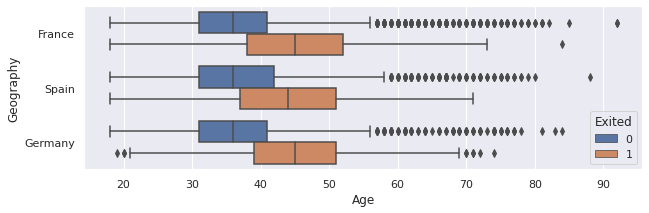

In [9]:
# посмотрим на распределения по возрасту и по странам ушедших клиентов
plt.rcParams['figure.figsize'] = (10,3)
sns.boxplot(data=churn_data, x='Age', y='Geography', hue='Exited')

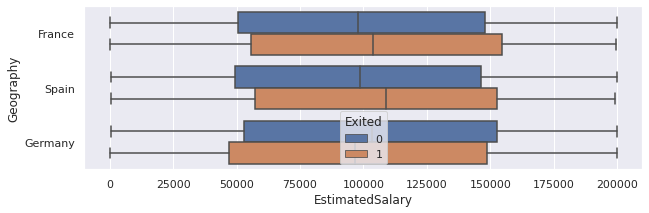

In [10]:
# распределения по признаку предполагаемой зарплаты
sns.boxplot(data=churn_data, x='EstimatedSalary', y='Geography', hue='Exited');

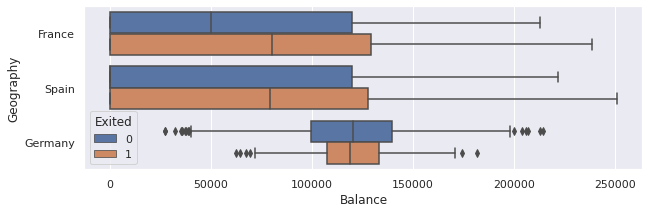

In [11]:
# распределения по тому, сколько у клиента денег на счетах в банке
sns.boxplot(data=churn_data, x='Balance', y='Geography', hue='Exited');

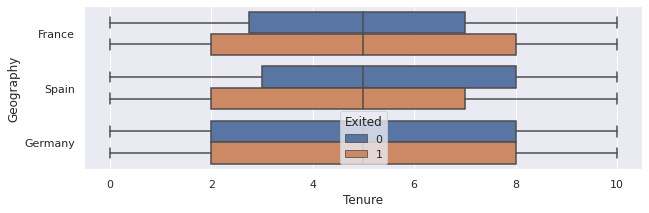

In [12]:
# распределения по тому,сколько лет клиент пользуется банком
sns.boxplot(data=churn_data, x='Tenure', y='Geography', hue='Exited');

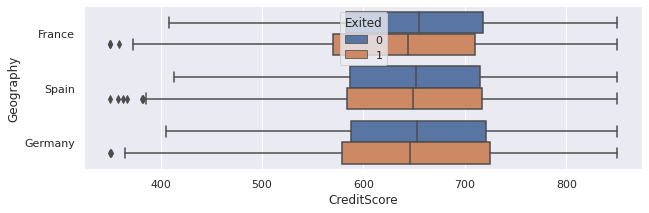

In [13]:
# распределения по кредитному рейтингу
sns.boxplot(data=churn_data, x='CreditScore', y='Geography', hue='Exited');

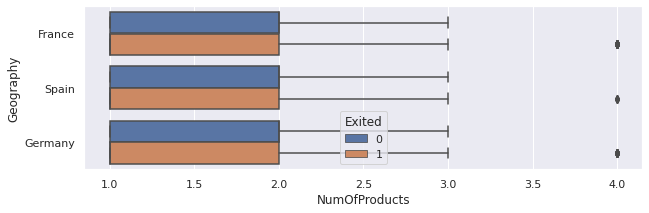

In [14]:
# распределения по числу услуг
sns.boxplot(data=churn_data, x='NumOfProducts', y='Geography', hue='Exited');

Для Германии посмотрю распределения ушедших/оставшихся клиентов по признакам активного членства и наличия кредитной карты

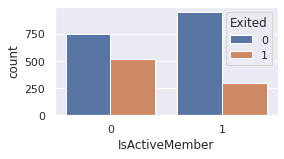

In [15]:
plt.rcParams['figure.figsize'] = (4,2)
sns.countplot(data=churn_data[churn_data['Geography'] == 'Germany'], x='IsActiveMember', hue='Exited');

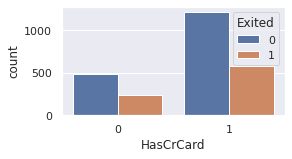

In [16]:
sns.countplot(data=churn_data[churn_data['Geography'] == 'Germany'], x='HasCrCard', hue='Exited');

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [17]:
germany_data = churn_data[churn_data['Geography'] == 'Germany']
germany_data.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [18]:
germany_data = germany_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
germany_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [19]:
germany_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [20]:
germany_data[germany_data.duplicated()].sum()

CreditScore        0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

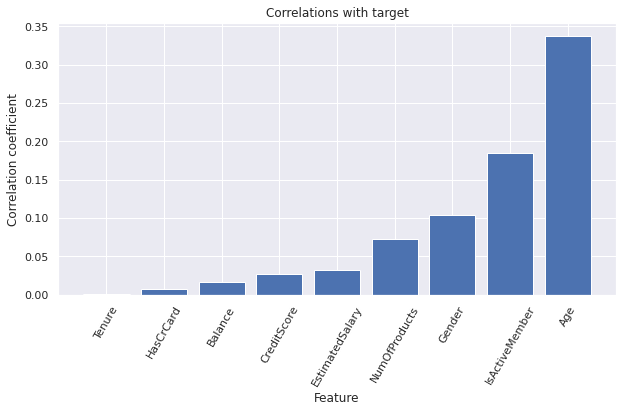

In [21]:
# Построим столбчатую диаграмму для модульного значения корреляций
# переведу в числовой признак пола
num_data = germany_data.copy()
num_data['Gender'] = num_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
#Вычисляем модуль корреляции
corr_with_target = num_data.corr()['Exited'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('Exited')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
plt.xticks(rotation=60)
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [22]:
# Отношение баланса на счетах к заработной плате 
germany_data['BalanceSalaryRatio'] = germany_data['Balance']/germany_data['EstimatedSalary']
# Отношение времени пользования услугами банка к возрасту клиента
germany_data['TenureByAge'] = germany_data['Tenure']/germany_data['Age']
# отношение кредитного рейтинга к возрасту клиента
germany_data['CreditScoreGivenAge'] = germany_data['CreditScore']/germany_data['Age']

# Остался всего один текстовый признак - с полом, закодирую пол 1 - Male, 0 - Female
germany_data['Gender'] = germany_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Выведу основные статистические характеристики методом describe()
germany_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432,9.024870,0.134303,17.526487
std,98.168937,0.499498,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256,214.286020,0.087680,5.349558
min,350.000000,0.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000,0.192582,0.000000,6.112676
25%,584.000000,0.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000,0.783284,0.060606,13.686275
50%,651.000000,1.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000,1.197220,0.125000,16.857143
75%,722.000000,1.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000,2.400083,0.200000,20.852941
max,850.000000,1.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000,10614.655440,0.500000,46.388889


Посмотрю как на распределения числовых переменных повлияет логарифмирование

<AxesSubplot: >

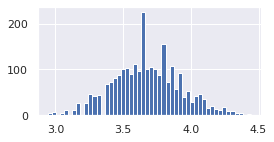

In [23]:
np.log(germany_data.Age +1).hist(bins=50)

<AxesSubplot: >

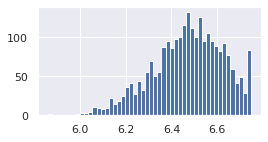

In [24]:
np.log(germany_data.CreditScore+1).hist(bins=50)

<AxesSubplot: >

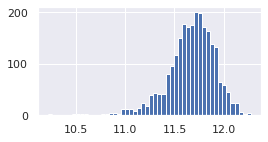

In [25]:
np.log(germany_data.Balance+1).hist(bins=50)

<AxesSubplot: >

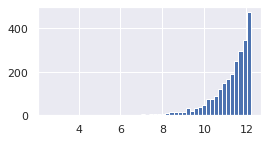

In [26]:
np.log(germany_data.EstimatedSalary +1).hist(bins=50)

<AxesSubplot: >

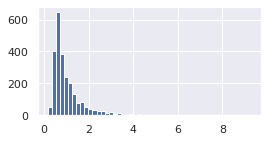

In [27]:
np.log(germany_data.BalanceSalaryRatio +1).hist(bins=50)

<AxesSubplot: >

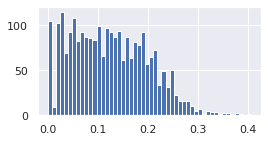

In [28]:
np.log(germany_data.TenureByAge +1).hist(bins=50)

<AxesSubplot: >

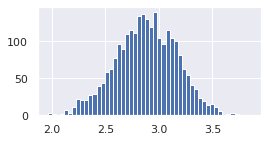

In [29]:
np.log(germany_data.CreditScoreGivenAge +1).hist(bins=50)

In [30]:
germany_data.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621


Также любопытно посмотреть некоторые сводные таблицы по синтезированным признакам

In [31]:
germany_data.pivot_table(
    values='TenureByAge',
    index=['Tenure'],
    columns=['Exited'],
    aggfunc=['median', 'mean', 'max', 'sum', 'count'],
)

median                mean                 max                  sum  \
Exited         0         1         0         1         0         1          0   
Tenure                                                                          
0       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
1       0.029412  0.021277  0.029348  0.022751  0.055556  0.047619   4.666310   
2       0.055556  0.044949  0.056783  0.046299  0.111111  0.083333  11.981188   
3       0.083333  0.066667  0.085484  0.068764  0.166667  0.130435  15.130619   
4       0.117647  0.086957  0.116955  0.095637  0.181818  0.200000  18.244943   
5       0.135135  0.108696  0.141319  0.116341  0.277778  0.217391  23.882989   
6       0.166667  0.136364  0.170643  0.143057  0.285714  0.272727  25.767142   
7       0.200000  0.152174  0.202184  0.158869  0.318182  0.291667  33.158229   
8       0.222222  0.181818  0.228947  0.191170  0.421053  0.380952  40.523621   
9       0.243243  0.204545  0.245822  0.214231  0.500000  0.473684  43.264684   
10      0.277778  0.222222  0.286249  0.231995  0.454545  0.357143  24.617424   

                  count       
Exited          1     0    1  
Tenure                        
0        0.000000    69   36  
1        2.388857   159  105  
2        2.963141   211   64  
3        5.776152   177   84  
4        7.268427   156   76  
5       10.470713   169   90  
6       10.872306   151   76  
7        9.690997   164   61  
8       16.631814   177   87  
9       19.923454   176   93  
10       9.743792    86   42

In [32]:
germany_data.pivot_table(
    values='BalanceSalaryRatio',
    index=['IsActiveMember', 'HasCrCard'],
    columns=['Exited'],
    aggfunc=['median', 'mean', 'min', 'max', 'sum', 'count'],
)

median                mean                  min  \
Exited                           0         1         0          1         0   
IsActiveMember HasCrCard                                                      
0              0          1.177016  1.218116  4.126752  14.042202  0.237493   
               1          1.104409  1.249400  4.280144   4.947137  0.301990   
1              0          1.203325  1.280416  3.619858   7.493465  0.227632   
               1          1.217550  1.231186  3.785985  57.153393  0.192582   

                                           max                        sum  \
Exited                           1           0             1            0   
IsActiveMember HasCrCard                                                    
0              0          0.446388  182.292653   1326.102779   837.730664   
               1          0.419779  233.665128    437.980842  2311.277632   
1              0          0.353536   97.285928    196.106581  1006.320538   
               1          0.412250  349.521987  10614.655440  2551.754000   

                                       count       
Exited                               1     0    1  
IsActiveMember HasCrCard                           
0              0           1965.908214   203  140  
               1           1870.017654   540  378  
1              0            726.866084   278   97  
               1          11373.525256   674  199

In [33]:
germany_data.pivot_table(
    values='CreditScoreGivenAge',
    index=['Gender', 'NumOfProducts'],
    columns=['Exited'],
    aggfunc=['median', 'mean', 'min', 'max', 'sum', 'count'],
)

median                  mean                   min  \
Exited                        0          1          0          1          0   
Gender NumOfProducts                                                          
0      1              18.184211  14.725490  18.779726  15.529066   6.813333   
       2              18.050000  14.235294  18.457799  14.808667   6.229730   
       3              20.448276  14.669956  20.866143  15.111575  15.780488   
       4                    NaN  14.989315        NaN  14.819986        NaN   
1      1              18.484793  13.918919  18.784414  14.827110   6.112676   
       2              18.244444  15.263158  18.567519  15.627672   7.014286   
       3              18.400000  15.180357  19.484500  15.372360  15.634146   
       4                    NaN  15.377778        NaN  14.509974        NaN   

                                       max                     sum  \
Exited                        1          0          1            0   
Gender NumOfProducts                                                 
0      1               6.157895  39.777778  34.809524  6591.683904   
       2               6.515152  40.388889  29.583333  7143.168329   
       3               8.321429  26.120000  25.827586   146.063004   
       4               9.413793        NaN  20.658537          NaN   
1      1               7.423729  46.388889  41.750000  7889.453881   
       2               7.838710  38.636364  26.125000  9785.082680   
       3               9.323077  24.419355  29.607143    58.453501   
       4              11.734694        NaN  16.446809          NaN   

                                   count         
Exited                          1      0      1  
Gender NumOfProducts                             
0      1              4860.597595  351.0  313.0  
       2              1110.650049  387.0   75.0  
       3               695.132470    7.0   46.0  
       4               207.479800    NaN   14.0  
1      1              3929.184028  420.0  265.0  
       2               797.011277  527.0   51.0  
       3               614.894381    3.0   40.0  
       4               145.099737    NaN   10.0

о, интересненько, среди тех, кто пользуется всеми 4мя услугами банка вообще нет оставшихся? все ушли? что же их так разочаровало?

In [34]:
germany_data[germany_data['NumOfProducts'] == 4]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
70,738,1,58,2,133745.44,4,1,0,28373.86,1,4.713685,0.034483,12.724138
1469,819,0,49,1,120656.86,4,0,0,166164.30,1,0.726130,0.020408,16.714286
1876,640,1,39,9,131607.28,4,0,1,6981.43,1,18.851049,0.230769,16.410256
2196,773,1,47,2,118079.47,4,1,1,143007.49,1,0.825687,0.042553,16.446809
2285,630,1,50,3,129370.91,4,1,1,47775.34,1,2.707901,0.060000,12.600000
2614,546,0,58,3,106458.31,4,1,0,128881.87,1,0.826015,0.051724,9.413793
2617,692,1,45,6,152296.83,4,0,1,108040.86,1,1.409623,0.133333,15.377778
4013,720,0,57,1,162082.31,4,0,0,27145.73,1,5.970822,0.017544,12.631579
4014,641,0,51,2,117306.69,4,1,1,26912.72,1,4.358782,0.039216,12.568627


In [35]:
#Логарифмируем числовые признаки, чтобы придать им форму нормального распределения
g_data_log = germany_data.copy()
# список признаков для логарифмирования
cols_for_log = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 
            'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']

# логарифмирую числовые признаки для придания формы нормального распределения
for i  in list(g_data_log.columns):
    if i in cols_for_log:
        g_data_log[i] = np.log(g_data_log[i]+1)

Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [36]:
X = g_data_log.drop("Exited", axis=1)
y = g_data_log["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [37]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [39]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [40]:
# Производим нормализацию данных с помощью min-max нормализации
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Укажите название метрики и обоснования своего выбора здесь


         Для минимизирования как ложноположительных (ошибки I рода), так и ложноотрицательных (ошибки II рода) срабатываний модели необходимо подобрать наиболее оптимальную и сбалансированную комбинацию метрик Precision   и recall, такой интегральной метрикой является F-мера, на нее и будем ориентироваться, но при этом будем посматривать также на равновесие между Precision и recall, то есть воспользуемся методом classification_report который выведет нам все интересующие нас метрики в едином отчете

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Ваши рассуждения и ответ — *здесь*.


Precision (точность), или PPV (Positive Predictive Value) — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными. То есть  эта метрика показывает способность модели отделять ушедших клиентов от оставшихся

Recall (полнота), или TPR (True Positive Rate) — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса. То есть эта метрика характеризует обобщающую способность модели находить ушедших клиентов среди всех клиентов 

 (F-мера) — это взвешенное среднее гармоническое между precision и recall
 
 

Преимущество F-меры состоит в том, что эта метрика равна своему максимуму (1), если и precision, и recall равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и F-мера будет близка к 0. 


### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [41]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    random_state=42, #генератор случайных чисел
    max_iter=1000, #количество итераций на сходимость
    penalty='l2',
    C=4000
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.82      1271
           1       0.62      0.44      0.52       610

    accuracy                           0.73      1881
   macro avg       0.69      0.66      0.67      1881
weighted avg       0.72      0.73      0.72      1881

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       424
           1       0.62      0.45      0.52       204

    accuracy                           0.73       628
   macro avg       0.69      0.66      0.67       628
weighted avg       0.72      0.73      0.72       628



## Мои выводы и рассуждения 

        Методом перебора возможных методов регуляризации penalty и  C - коэффициента, обратного регуляризации, я опытным путем нашла наилучшую метрику F-меры равную 0,52 либо при отсутствии регуляризации solver='none', либо увеличение коэффициента C давало тот же самый эффект, уменьшая степень регуляризации и улучшая целевую метрику. Наиболее оптимальный результат нашла при С=4000, тут при равной F-мере получились максимальные значения recall, то есть немного меньше ложноотрицательных срабатываний, по этой метрике модель получилась все равно немного недообученной, ложноположительных срабатываний поменьше 
    
        То есть в принципе, мы можем либо совсем отключить регулярицию, выставив penalty='none' (по умолчанию применяется 'l2'  и это делало модель недообученной, выдавая F-меру менее 0.5), либо выставив коэффициент С побольше получали тот же самый эффект.
    
        Мне все таки удалось выполнить условие задания, подобрать параметры и добиться целевой метрики F-меры равной 0.52, то есть модель уже нельзя считать недообученной (как и переобученной ее считать не стоит), но это все равно довольно слабый результат - модель дает верные предсказания лишь в чуть более чем половине случаев, что равноценно подбрасыванию монетки

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [42]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
#Обучаем генератор на тренировочной выборке
poly.fit(X_train_scaled)

#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test_scaled)

#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LogisticRegression(
    random_state=42, #генератор случайных чисел
    max_iter=1000, #количество итераций на сходимость
    penalty='l2',
    C=250
    )
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_predict_poly))
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_predict_poly))

(1881, 454)
(628, 454)
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1271
           1       0.81      0.71      0.76       610

    accuracy                           0.85      1881
   macro avg       0.84      0.81      0.82      1881
weighted avg       0.85      0.85      0.85      1881

              precision    recall  f1-score   support

           0       0.84      0.88      0.85       424
           1       0.71      0.64      0.68       204

    accuracy                           0.80       628
   macro avg       0.77      0.76      0.77       628
weighted avg       0.80      0.80      0.80       628



/home/daria/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Мои выводы и рассуждения 

    С использованием полиномиальных признаков удалось улучшить модель на 0.24 единицы F-меры для тренировочночной выборки и на 0.16 единиц для тестовой. Перебор параметров регуляризации показал наилучшие результаты метрики при L2 регуляризации и коэффициенте регуляризации C равном 250, меньше и больше этого числа для коэффициента результаты были хуже. Такие же или хуже результаты метрики получались при других параметрах алгоритма оптимизации solver, например, с алгоритмом "newton-cg" удалось такую же метрику получить, но лучше результата достичь не получалось, поэтому оставила алгоритм по умолчанию - "lbfgs". Для него кстати доступна только L2 регуляризация, L1 можно попробовать только в алгоритмах "saga" и "liblinear", но улучшения результата они не дали

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

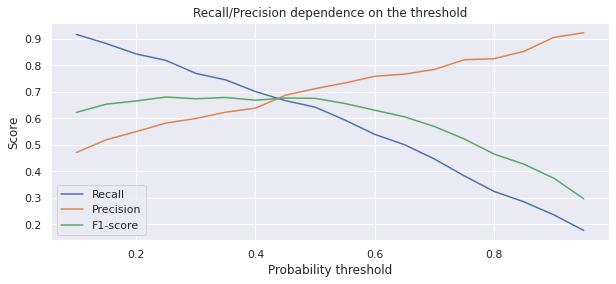

In [43]:
sns.set_theme()
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = lr_model_poly.predict_proba(X_test_poly)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
# также посчитаем для тренировочной выборки
y_train_proba_pred = pd.Series(lr_model_poly.predict_proba(X_train_poly)[:, 1])

#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []

#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость

#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')

#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

In [44]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.43

y_train_pred_opt = y_train_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_train, y_train_pred_opt))
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1271
           1       0.74      0.76      0.75       610

    accuracy                           0.84      1881
   macro avg       0.81      0.82      0.82      1881
weighted avg       0.84      0.84      0.84      1881

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       424
           1       0.68      0.68      0.68       204

    accuracy                           0.79       628
   macro avg       0.76      0.76      0.76       628
weighted avg       0.79      0.79      0.79       628



## Мои выводы и рассуждения

    Найден оптимальный порог вероятности оттока клиентов банка для тестовой выборки равный 0.43
    При данном значении порога вероятности метрика F-мера максимальна, равна 0.68 ед. для тестовой выборки и равнозначна с метриками recall и precision, то есть не будет смещения в сторону ложноположительных либо ложноотрицательных срабатываний модели. 
    
    Для тренировочных данных при выбранном пороге вероятности все метрики повыше чем для тестовой и немного смещены в сторону ложноположительных срабатываний (precision на 0.02 ед ниже чем recall). Это говорит об имеющем место некотором переобучении модели. В любом случае использование полиномиальных признаков улучшило нашу модель по сравнению с baseline

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [45]:
# Разделим набор данных без логарифмирования и шкалирования на матрицу наблюдений X (фичи) 
# и столбец ответов y (таргет)
X = germany_data.drop("Exited", axis=1)
y = germany_data["Exited"]

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [47]:
# проверим что число лояльных и ушедших клиентов примерно равно в каждой из выборок
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Импортируем необходимые для выполнения практики модули:

In [48]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [49]:
#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', # энтропия Шеннона
    random_state=42
)
#Обучаем дерево по алгоритму CART
dt.fit(X_train, y_train)

#Делаем предсказания для тренировочной и тестовой выборок 
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       424
           1       0.59      0.55      0.57       204

    accuracy                           0.73       628
   macro avg       0.69      0.68      0.69       628
weighted avg       0.72      0.73      0.73       628



## Мои выводы и рассуждения 

Значение целевой метрики F-меры на тренировочной выборке равно 1, на тестовой - 0,57. Получившаяся модель является переобученной, то есть она идеально подстроилась под тренировочную выборку, точно подобрав все параметры предикатов для частного случая,  но при этом не уловила более общих закономерностей, отчего на тестовой выборке целевая метрика совсем низкая

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [50]:
#Создаем объект класса дерево решений
dt_cut = tree.DecisionTreeClassifier(
    criterion='entropy', # энтропия Шеннона
    min_samples_leaf=10,
    max_depth=8,
    random_state=42
)
#Обучаем дерево по алгоритму CART
dt_cut.fit(X_train, y_train)

#Делаем предсказания для тренировочной и тестовой выборок 
y_train_pred = dt_cut.predict(X_train)
y_test_pred = dt_cut.predict(X_test)

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.58      0.64       204

    accuracy                           0.79       628
   macro avg       0.76      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



## Мои выводы и рассуждения 

С ограничением максимальной глубины дерева равной 8 и указании минимального числа объектоа на листе равном 10 (это значит, что модель порождает только такие правила, которые верны минимум для 10 объектов), мы видим, что степень переобучения значительно понизилась, вместо идеального результата целевой метрики равной единице, мы получили значение F-меры для тренировочной выборки равное 0.72, и для тестовой равное 0.64. Это случилось потому, что теперь модель не могла неограниченно генерировать предикаты для каждого частного случая и смогла уловить более общие закономерности, верные не менее чем для 10 объектов, что повысило метрику в тестовой выборке. При этом ограничение глубины дерева не дало модели и для тренировочной выборки найти идеальный результат, так что она получилась более "честная"

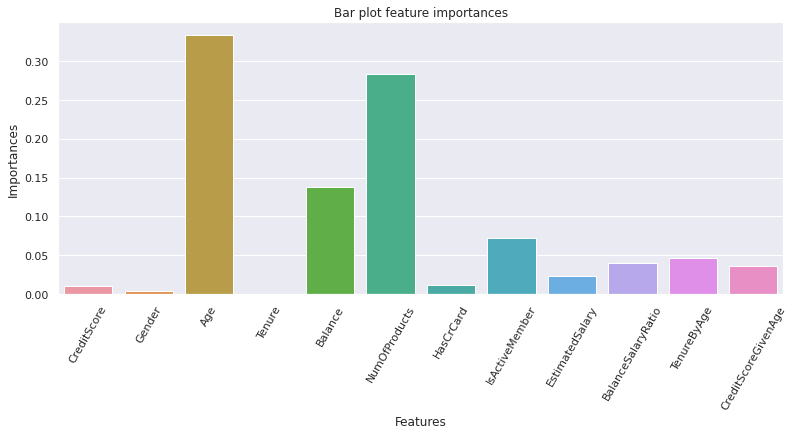

In [51]:
# Интересно посмотреть на значимость признаков, визуализирую
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
plt.xticks(rotation=60)
feature = X.columns #признаки
feature_importances = dt_cut.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [52]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train, y_train)

#Делаем предсказания для тренировочной и тестовой выборок 
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#Выводим значения метрики 
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.74
Test: 0.66


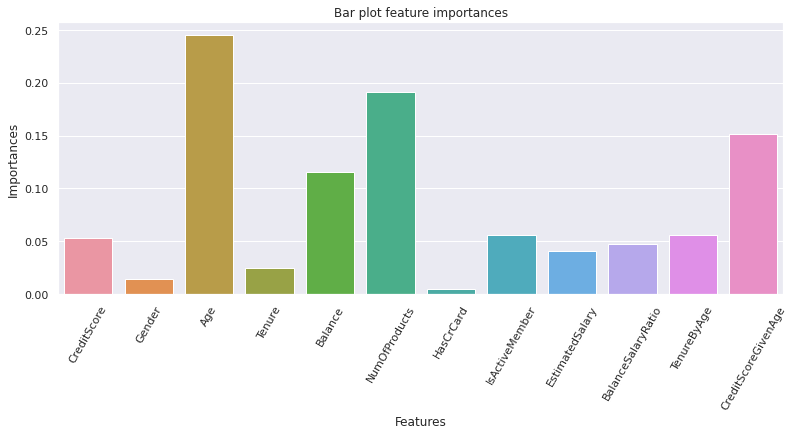

In [53]:
# Также посмотрю как изменилась важность признаков для леса решений
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
plt.xticks(rotation=60)
feature = X.columns #признаки
feature_importances = rf.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

## Мои выводы и рассуждения 

Модель на основе случайного леса немного улучшила целевую метрику, на 0.02 единицы для тренировочной и для тестовой выборок, при том, что все остальные параметры дерева решений остались теми же. Кроме того, несколько изменилась оценка значимости признаков - там, где одно дерево при установленных нами ограничениях "успевало" оценить 3 основных признака (Age, Balance, NumOfProducts), модель на основе случайного леса, уменьшив разброс (вариативность ошибок) более объективно оценила и другие признаки, что повышает вероятность правильного предсказания класса для новых данных

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

/home/daria/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daria/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


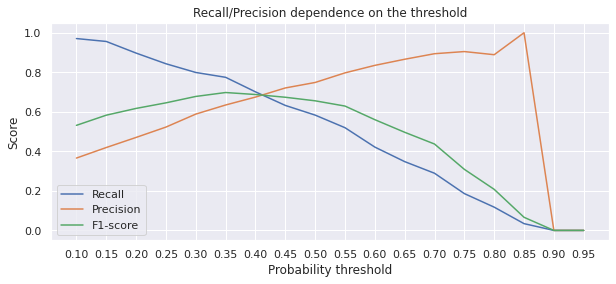

In [54]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [55]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.42
#Сделаем предсказания для тренировочной и тестовой выборок
y_train_proba_pred =  pd.Series(rf.predict_proba(X_train)[:, 1])
y_test_proba_pred =  pd.Series(rf.predict_proba(X_test)[:, 1])

#Клиентов, у которых вероятность уйти больше 0.42 относим к классу 1
#В противном случае - к классу 0
y_train_pred_opt = y_train_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_train, y_train_pred_opt))
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1271
           1       0.79      0.72      0.75       610

    accuracy                           0.85      1881
   macro avg       0.83      0.81      0.82      1881
weighted avg       0.85      0.85      0.85      1881

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       424
           1       0.68      0.68      0.68       204

    accuracy                           0.79       628
   macro avg       0.76      0.76      0.76       628
weighted avg       0.79      0.79      0.79       628



## Мои выводы и рассуждения

Найден оптимальный порог вероятности равный 0.42. При данном значении порога вероятности метрика F-мера максимальна, равна 0.68 ед. для тестовой выборки и равнозначна с метриками recall и precision, то есть не будет смещения в сторону ложноположительных либо ложноотрицательных срабатываний модели. 

Полученное с оптимальным порогом вероятности значение целевой метрики на 0.02 единицы выше чем у изначальной модели случайного леса, то есть качество модели улучшилось. При этом метрика F-мера равная 0.68 равна метрике полученной ранее на модели логистической регрессии, только нам не пришлось масштабировать данные, генерировать полиномиальные признаки и подбирать параметры регуляризации. То есть, с использованием алгоритма случайного леса удалось получить такое же качество модели, при этом значительно упростив предобработку и рассчеты

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

Поскольку по качеству модель линейной регрессии и модель случайного леса одинаковые, сделаю предсказания для каждой и сравню результат

In [56]:
# Предскажем метку класса для Василия на основе модели случайного леса с оптимальным порогом вероятности
vasiliy_dict = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
vasiliy_df = pd.DataFrame(vasiliy_dict)

#Сгенерирую новые признаки для Василия
# Отношение баланса на счетах к заработной плате 
vasiliy_df['BalanceSalaryRatio'] = vasiliy_df['Balance']/vasiliy_df['EstimatedSalary']
# Отношение времени пользования услугами банка к возрасту клиента
vasiliy_df['TenureByAge'] = vasiliy_df['Tenure']/vasiliy_df['Age']
# отношение кредитного рейтинга к возрасту клиента
vasiliy_df['CreditScoreGivenAge'] = vasiliy_df['CreditScore']/vasiliy_df['Age']
# Остался всего один текстовый признак - с полом, закодирую пол 1 - Male, 0 - Female
vasiliy_df['Gender'] = vasiliy_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Предскажем вероятность ухода
vasiliy_proba_pred =  pd.Series(rf.predict_proba(vasiliy_df)[:, 1])
#Задаем оптимальный порог вероятностей
threshold_opt = 0.42
#Предскажем метку класса
vasiliy_pred_opt = vasiliy_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

#предсказанная вероятность ухода Василия
print('Вероятность ухода Василия - ', vasiliy_proba_pred[0].round(2))
#Выведу предсказанную метку класса
print('Предсказанная метка класса для Василия - ', vasiliy_pred_opt[0])

Вероятность ухода Василия -  0.61
Предсказанная метка класса для Василия -  1


In [57]:
# Предсказание для Василия на модели линейной регрессии с полиномиальными признаками
#Логарифмирую новые данные
vasiliy_lr = vasiliy_df.copy()
# список признаков для логарифмирования
cols_for_log = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 
            'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']

# логарифмирую числовые признаки для придания формы нормального распределения
for i  in list(vasiliy_lr.columns):
    if i in cols_for_log:
        vasiliy_lr[i] = np.log(vasiliy_lr[i]+1)
        
# Нормализую новые данные 
vasiliy_scaled = scaler.transform(vasiliy_lr)
#Cгенерирую полиномиальные признаки 
vasiliy_poly = poly.transform(vasiliy_scaled)

#Сделаю предсказание вероятности ухода Василия
vasiliy_poly_proba_pred = pd.Series(lr_model_poly.predict_proba(vasiliy_poly)[:, 1])

#Задам оптимальный порог вероятностей найденный ранее для модели линейной регрессии
threshold_opt = 0.43

#Сделаю предсказание метки класса на основе вычисленного оптимального порога вероятности
vasiliy_poly_pred_opt = vasiliy_poly_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

#предсказанная вероятность ухода Василия
print('Вероятность ухода Василия - ', vasiliy_poly_proba_pred[0].round(2))
#Выведу предсказанную метку класса
print('Предсказанная метка класса для Василия - ', vasiliy_poly_pred_opt[0])

Вероятность ухода Василия -  0.73
Предсказанная метка класса для Василия -  1


## Мои выводы и рассуждения

Итак, обе наилучшие модели предсказания оттока клиентов предполагают, что Василий нас покинет, так что сотрудникам банка стоит позвонить Василию с каким-нибудь интересным предложением